In [1]:
import pandas as pd
import os

In [30]:
#getting the files fro directory
files =[]
for file in os.listdir('./raw_datas'):
    files.append(file)

In [31]:
#set up a empty data frame.
#concate all the the data frame to one data frame
months_all_data = pd.DataFrame()

for file in files: # getting files name from the list
    df=pd.read_csv('./raw_datas/'+file) # load each csv file to df
    months_all_data=pd.concat([months_all_data,df])
    
    
months_all_data.to_csv('./all_data_combined/all_data.csv',index=False)

In [32]:
all_data = pd.read_csv('./all_data_combined/all_data.csv')

In [5]:
#saveing the description and data types for comparing the cahnges after modify
'''
raw_description=pd.DataFrame(all_data.describe())
raw_description.to_csv("./raw_data_description/combined_raw_data_description.csv")
data_types = pd.DataFrame(all_data.dtypes)
data_types.to_csv('./raw_data_description/combined_data_datatypes.csv')

toal_data_by_column=pd.DataFrame(all_data.count())
toal_data_by_column.to_csv('./raw_data_description/toal_data_by_column.csv')
total_null_values_by_coulum =pd.DataFrame(all_data.isnull().sum())
total_null_values_by_coulum.to_csv('./raw_data_description/total_null_values_by_coulum.csv')
'''
print(all_data.isnull().sum())
print(all_data.columns.isnull())


Unnamed: 0            0
Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64
[False False False False False False False]


In [6]:
#every columm has null value

In [7]:
#testing perpouse
'''
description_list = ["raw_description","data_types","toal_data_by_column"]
method_list = ["describe()","dtypes","count()"]
dict_data ={
    "raw_description_1":all_data.describe(),
    "data_types_1":all_data.dtypes,
    "toal_data_by_column_1":all_data.count()
}
'''

'\ndescription_list = ["raw_description","data_types","toal_data_by_column"]\nmethod_list = ["describe()","dtypes","count()"]\ndict_data ={\n    "raw_description_1":all_data.describe(),\n    "data_types_1":all_data.dtypes,\n    "toal_data_by_column_1":all_data.count()\n}\n'

# clear_up data set

#### removing the null values

In [35]:

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [39]:
# showing only null values
nall_value_df = all_data[all_data.isna().any(axis=1)]
nall_value_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# dropping the nulll values from orginal data frame
all_data = all_data.dropna(how="all")
all_data.head()
all_data.to_csv('./all_data_combined/all_data_null_cleaned.csv',index=False)

In [2]:
all_data = pd.read_csv('./all_data_combined/all_data_null_cleaned.csv')

In [3]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### removing row based on condition

In [4]:
all_data =all_data[all_data['Order Date'].str[0:2] !='Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# Adding extra data with columns

#### adding "Months_sels" columns  as a int to find the total seal on a month

In [5]:
all_data['Months_sels']=all_data['Order Date'].str[0:2]

#### converting the "Months_sels" data to int32

In [6]:

all_data['Months_sels']=all_data['Months_sels'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months_sels
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


# which month the company gets best sels ? 
### for this answer we have to following some setps according to the data we have 
#### total_seals_per_months = ['Quantity Ordered'] * ['Price Each']
#### converting  ['Quantity Ordered'] ['Price Each'] as intiger

In [7]:
all_data['Quantity Ordered'] =pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] =pd.to_numeric(all_data['Price Each'])

In [8]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Months_sels           int32
dtype: object

In [10]:
all_data['total_seals_per_months'] =all_data['Quantity Ordered']*all_data['Price Each']

In [38]:
all_data.head(80)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months_sels,total_seals_per_months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
75,176629,USB-C Charging Cable,1,11.95,04/24/19 11:56,"101 Lincoln St, San Francisco, CA 94016",4,11.95
76,176630,Google Phone,1,600.00,04/10/19 05:01,"770 Maple St, San Francisco, CA 94016",4,600.00
77,176631,USB-C Charging Cable,1,11.95,04/13/19 18:48,"292 Dogwood St, San Francisco, CA 94016",4,11.95
78,176632,AAA Batteries (4-pack),1,2.99,04/14/19 14:28,"814 Madison St, San Francisco, CA 94016",4,2.99


In [17]:
df_groupby=all_data.groupby('Months_sels').sum()

In [19]:
#df_groupby.to_csv('./output_files/gropuBy_month_with_total_sels')

In [20]:
df_groupby

,Quantity Ordered,Price Each,total_seals_per_months
Months_sels,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


In [21]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

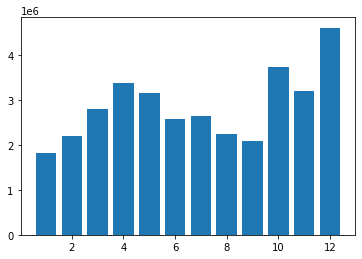

In [35]:
months = range(1,13)
#months_name = ['January','February','March','March','April','May','June','July','August','September','October','November','December']

    
plt.bar(months,df_groupby['total_seals_per_months'])
plt.show

# Now we want to find whcih city has the height sell
### adding a city colum get a name from "Purchase Address" columns

In [3]:
all_data = pd.read_csv('./all_data_combined/checkPoint_converted28.csv')


In [6]:
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months_sels
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [31]:
#makeing function to split data from "Purchase Address" address
def get_only_city_name(name):
    return name.split(',')[1]

def get_unique_name(unq_name):
    return unq_name.split(',')[2].split(' ')[1]

In [29]:
#applig the function to a list
list_name=[]
list_name=all_data['Purchase Address'].apply(lambda x: f' {get_only_city_name(x)} ({get_unique_name(x)})' )

In [34]:
#add the list with new column
all_data['City name']=list_name

In [94]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months_sels,City name,total_seals_per_months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


In [4]:
import pandas as pd


In [5]:

all_data=pd.read_csv('./all_data_combined/check_point.csv')

In [6]:
city_basedd_price=all_data.groupby('City name').sum()

In [91]:
type(city_basedd_price)

pandas.core.frame.DataFrame

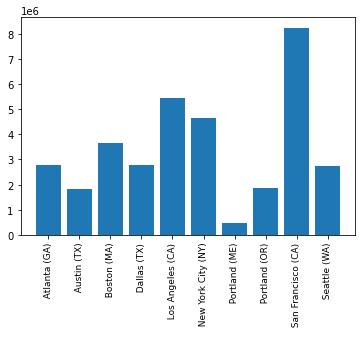

In [8]:
import matplotlib.pyplot as plt
#ploting data cities_name vs 
cities_name = [city for city,df in all_data.groupby('City name')]

plt.bar(cities_name,city_basedd_price['total_seals_per_months'])
plt.xticks(cities_name,rotation='vertical',size=9)
plt.show()

# What is the best time,  in a day that people are buying products

In [11]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [13]:
all_data['Sell Hour']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months_sels,City name,total_seals_per_months
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles (CA),8.97
185946,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco (CA),700.00
185947,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,San Francisco (CA),700.00
185948,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,San Francisco (CA),379.99


In [16]:
all_data['sell Hour']=all_data['Order Date'].dt.hour
all_data['sell Munites']=all_data['Order Date'].dt.minute
all_data['Time Frequency']=1

In [29]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Months_sels', 'City name',
       'total_seals_per_months', 'sell Hour', 'sell Munites',
       'Time Frequency'],
      dtype='object')

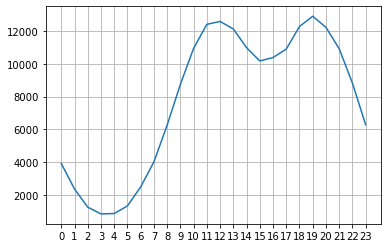

In [28]:
#ploting
result=all_data.groupby(['sell Hour']).count()
hours= [hour for hour,df in all_data.groupby(all_data['sell Hour'])]

plt.plot(hours,result['Time Frequency'])
plt.xticks(hours)
plt.grid()
plt.show()

# What Products are often sell togerther ?

In [51]:
# create a new data frame
#sorting the duplicate orderIDs
new_df = pd.read_csv('./output_files/grouped_by_productid.csv')
new_df=all_data[all_data['Order ID'].duplicated(keep=False)]

In [52]:
#adding a new columns
#same order ids with diffrent products
# adding same orders ids product to new columns
new_df['Grouped_products']=new_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

<ipython-input-52-37f56b9c9f0b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Grouped_products']=new_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [54]:

new_df=pd.read_csv('./output_files/grouped_by_productid.csv')
#=new_df[['Order ID'],['Grouped_products']]

In [55]:
new_df.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Months_sels', 'City name',
       'total_seals_per_months', 'sell Hour', 'sell Munites', 'Time Frequency',
       'Grouped_products'],
      dtype='object')

In [64]:
new_df=new_df[['Order ID','Grouped_products']].drop_duplicates()

In [66]:
new_df.head()

,Order ID,Grouped_products
0,176560,"Google Phone,Wired Headphones"
2,176574,"Google Phone,USB-C Charging Cable"
4,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
6,176586,"AAA Batteries (4-pack),Google Phone"
8,176672,"Lightning Charging Cable,USB-C Charging Cable"
